In [65]:
from dbfread import DBF
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

In [66]:
@np.vectorize
def decodifica_idade(idade, unidade='Y'):
    """
    Em tabelas do SINAN frequentemente a idade é representada como um inteiro que precisa ser parseado
    para retornar a idade em uma unidade cronológica padrão.
    :param unidade: unidade da idade: 'Y': anos, 'M' meses, 'D': dias, 'H': horas
    :param idade: inteiro ou sequencia de inteiros codificados.
    :return:
    """
    fator = {'Y': 1., 'M': 12., 'D': 365., 'H': 365*24.}
    if idade >= 4000: #idade em anos
        idade_anos = idade - 4000
    elif idade >= 3000 and idade < 4000: #idade em meses
        idade_anos = (idade-3000)/12.
    elif idade >= 2000 and idade < 3000: #idade em dias
        idade_anos = (idade-2000)/365.
    elif idade >= 1000 and idade < 2000: # idade em horas
        idade_anos = (idade-1000)/(365*24.)
    else:
        #print(idade)
        idade_anos = np.nan
        #raise ValueError("Idade inválida")
    idade_dec = idade_anos*fator[unidade]
    return idade_dec

In [67]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


### Zika

In [68]:
dbf17 = DBF('ECE-zika-2017-12-12-2017.dbf')
dbf18 = DBF('ECE-zika-2018-03-12-2018.dbf')
zika17 = pd.DataFrame(list(dbf17))
zika18 = pd.DataFrame(list(dbf18))
#zika17.head()

In [69]:
zika17['idade_anos'] = decodifica_idade(zika17.NU_IDADE_N)
zika18['idade_anos'] = decodifica_idade(zika18.NU_IDADE_N)

In [70]:
zika18.NU_ANO.value_counts()

2018    54
Name: NU_ANO, dtype: int64

In [71]:
zika18.columns

Index(['NU_NOTIFIC', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO',
       'DT_SIN_PRI', 'SEM_PRI', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO',
       'ID_BAIRRO', 'NM_BAIRRO', 'DT_DIGITA', 'ID_MUNICIP', 'idade_anos'],
      dtype='object')

In [72]:
zika17.columns

Index(['NU_ANO', 'ID_MN_RESI', 'NM_BAIRRO', 'ID_BAIRRO', 'ID_AGRAVO',
       'DT_SIN_PRI', 'SEM_PRI', 'DT_NOTIFIC', 'SEM_NOT', 'DT_NASC',
       'NU_IDADE_N', 'CS_SEXO', 'NU_NOTIFIC', 'DT_DIGITA', 'idade_anos'],
      dtype='object')

In [73]:
zika17.shape

(3424, 15)

In [74]:
zika17.DT_NOTIFIC = pd.to_datetime(zika17.DT_NOTIFIC)
zika17.DT_NASC = pd.to_datetime(zika17.DT_NASC)
zika17.set_index('DT_NOTIFIC', inplace=True)

In [75]:
zika18.DT_NOTIFIC = pd.to_datetime(zika18.DT_NOTIFIC)
zika18.DT_NASC = pd.to_datetime(zika18.DT_NASC)
zika18.set_index('DT_NOTIFIC', inplace=True)

### Dengue

In [76]:
den17 = DBF('ECE-2017-12-27-2017.dbf',encoding='latin-1')
den18 = DBF('ECE-2018-03-12-2018.dbf',encoding='latin-1')
den17 = pd.DataFrame(list(den17))
den18 = pd.DataFrame(list(den18))

In [77]:
den17['idade_anos'] = decodifica_idade(den17.NU_IDADE_N)
den18['idade_anos'] = decodifica_idade(den18.NU_IDADE_N)

In [78]:
den17.DT_NOTIFIC = pd.to_datetime(den17.DT_NOTIFIC)
den18.DT_NOTIFIC = pd.to_datetime(den18.DT_NOTIFIC)
den17.DT_NASC = pd.to_datetime(den17.DT_NASC)
den18.DT_NASC = pd.to_datetime(den18.DT_NASC)
den17.set_index('DT_NOTIFIC', inplace=True)
den18.set_index('DT_NOTIFIC', inplace=True)

### Chik

A Chikungunya é nossa doença de maior interesse, por apresentar uma alta incidência no estado do Ceará. Ainda não entendemos o porquê desse fenômeno, portanto, vamos procurar respostas nos dados.
Os dados referentes a Zika e Dengue servirão como uma espécie de controle, para podermos comparar nossas conclusões referentes à Chikungunya.

In [79]:
chik17 = DBF('ECE-CHIKV-2017-12-27-2017.dbf',encoding='latin-1')
chik17 = pd.DataFrame(list(chik17))

In [80]:
chik17['idade_anos'] = decodifica_idade(chik17.NU_IDADE_N)

In [81]:
chik17.shape

(137108, 15)

In [82]:
chik17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137108 entries, 0 to 137107
Data columns (total 15 columns):
DT_DIGITA     137108 non-null object
NU_NOTIFIC    137108 non-null object
ID_AGRAVO     137108 non-null object
DT_NOTIFIC    137108 non-null object
SEM_NOT       137108 non-null object
NU_ANO        137108 non-null object
DT_SIN_PRI    137108 non-null object
SEM_PRI       137108 non-null object
DT_NASC       134893 non-null object
NU_IDADE_N    137108 non-null float64
CS_SEXO       137108 non-null object
ID_MN_RESI    137108 non-null object
ID_BAIRRO     137108 non-null object
NM_BAIRRO     137108 non-null object
idade_anos    137107 non-null float64
dtypes: float64(2), object(13)
memory usage: 15.7+ MB


In [83]:
chik17.DT_NOTIFIC = pd.to_datetime(chik17.DT_NOTIFIC)
chik17.DT_NASC = pd.to_datetime(chik17.DT_NASC)
chik17.set_index('DT_NOTIFIC', inplace=True)

<IPython.core.display.Javascript object>


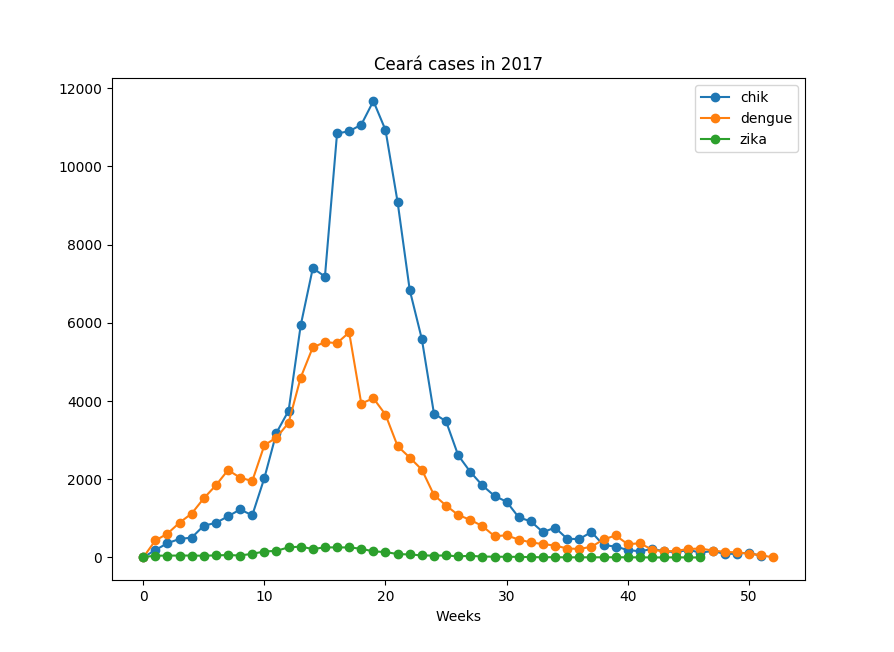

In [84]:
z17 = zika17.NU_ANO.resample('W').count()
#z18 = zika18.NU_ANO.resample('W').count()
d17 = den17.NU_ANO.resample('W').count()
c17 = chik17.NU_ANO.resample('W').count()
plt.plot(c17.values,'-o', label='chik');
plt.plot(d17.values, '-o', label='dengue');
plt.plot(z17.values, '-o', label='zika');
plt.xlabel('Weeks');
plt.title('Ceará cases in 2017');
plt.legend();
#plt.savefig('cases 2017.png', dpi=400)

In [85]:
chik17.columns

Index(['DT_DIGITA', 'NU_NOTIFIC', 'ID_AGRAVO', 'SEM_NOT', 'NU_ANO',
       'DT_SIN_PRI', 'SEM_PRI', 'DT_NASC', 'NU_IDADE_N', 'CS_SEXO',
       'ID_MN_RESI', 'ID_BAIRRO', 'NM_BAIRRO', 'idade_anos'],
      dtype='object')

In [86]:
chik17.ID_MN_RESI.value_counts() #contagem de casos por município

230440    69821
230370     7043
230765     3421
230110     2709
230770     2450
231270     2099
231290     2052
230280     1879
230640     1824
230410     1642
230550     1604
230210     1522
230970     1496
231140     1406
230350     1272
230523     1213
231180     1082
231170     1078
230030     1063
231240     1013
230250      993
230540      913
230830      905
230120      834
230730      817
230960      743
230800      725
230100      658
230470      645
230420      627
          ...  
230426       12
230150       12
230530       12
230790       11
230320       10
230880        9
230435        8
230840        7
231210        6
230200        6
230160        6
231060        5
231100        5
230720        4
231250        4
231110        4
230365        4
230423        3
231195        3
230427        2
231123        2
230170        2
230430        2
230070        2
230040        2
230480        2
230710        2
230920        1
230060        1
231095        1
Name: ID_MN_RESI, Length

Criando um dataframe com os casos de dengue, zika e chik agrupados por sexo e faixa etária

In [87]:
new = pd.concat([zika17,chik17,den17], axis=0) 

In [88]:
new.shape

(221031, 14)

In [90]:
def plotting_series(cases,variable):
    """ Recebe um dataframe de casos e a variável que direcionará o agrupamento.
    Nesse caso, queremos um gráfico para cada município (geocódigo), contendo as séries de dengue, zika e chik.
    """
    grouped = cases.groupby(variable)
    for g in grouped.groups:
        if str(g).startswith('23'): #todos os geocódigos de municípios do estado do Ceará começam por 23.
            df = grouped.get_group(g)
            diseases = {'A90':'dengue', 'A928':'zika', 'A92.0':'chik'}
            plt.clf()
            for disease in diseases:
                df_week = df[df.ID_AGRAVO==disease].resample('W').count()
                plt.plot(df_week['ID_AGRAVO'].values, '-o', label=diseases[disease])
            plt.xlabel('Weeks');
            plt.title('Cases in 2017 (city code: {})'.format(g));
            plt.legend();
            plt.savefig('figures/{} cases 2017.png'.format(g), dpi=400)

<IPython.core.display.Javascript object>


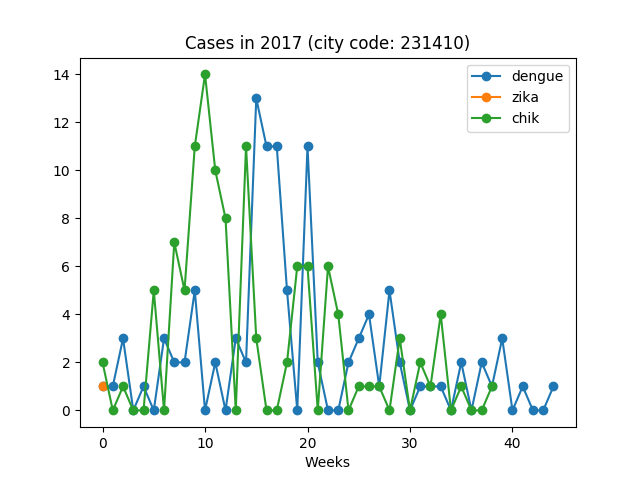

In [91]:
plotting_series(new,'ID_MN_RESI')

## Analisando incidência por sexo e faixa etária

In [92]:
chik17.NU_IDADE_N[chik17.NU_IDADE_N<1000].value_counts()

12.0    1
Name: NU_IDADE_N, dtype: int64

In [93]:
den17.NU_IDADE_N[den17.NU_IDADE_N<1000].value_counts()

0.0     3
35.0    1
Name: NU_IDADE_N, dtype: int64

In [94]:
zika17.NU_IDADE_N[zika17.NU_IDADE_N<1000].value_counts()

Series([], Name: NU_IDADE_N, dtype: int64)

In [95]:
den17 = den17[den17.NU_IDADE_N > 1000] #corrigindo erros de formatação de idade
chik17 = chik17[chik17.NU_IDADE_N > 1000]
zika17 = zika17[zika17.NU_IDADE_N > 1000]

In [96]:
chik17 = chik17[chik17.CS_SEXO != ''] #removendo faltantes (porque são poucos)
den17 = den17[den17.CS_SEXO != '']
zika17 = zika17[zika17.CS_SEXO != '']

In [97]:
bounds = list(range(0,95,5)) #limites inferiores das faixas etárias

In [98]:
def agrega_FE(df):
    "retorna casos por faixa etária do sexo masculino e feminino"
    M_PFE, bins = pd.np.histogram(df.idade_anos[df.CS_SEXO=='M'], bins=bounds)
    F_PFE, bins = pd.np.histogram(df.idade_anos[df.CS_SEXO=='F'], bins=bounds)
    return M_PFE, F_PFE, bins

In [99]:
zika17_M, zika17_F, bins = agrega_FE(zika17)
chik17_M, chik17_F, bins = agrega_FE(chik17)
den17_M, den17_F, bins = agrega_FE(den17)

In [100]:
chik17_M

array([1954, 2614, 3725, 4444, 5419, 5086, 4771, 4345, 3717, 3274, 3148,
       2403, 2164, 1873, 1345, 1081,  639,  389])

In [101]:
def concat_cases(casosM,casosF):
    """
    Retorna dataframe com contagem de casos por faixa etária, com uma coluna para cada sexo.
    """
    casos = pd.DataFrame()
    casos['bounds'] = bounds[:-1]
    casos['male'] = casosM
    casos['female'] = casosF
    casos.set_index(casos.bounds,inplace=True)
    #casos.index = casos.bounds
    del casos['bounds']
    return casos

In [102]:
zika_PFE = concat_cases(zika17_M, zika17_F)
den_PFE = concat_cases(den17_M, den17_F)
chik_PFE = concat_cases(chik17_M, chik17_F)

In [103]:
zika_PFE

,male,female
bounds,,
0,89,87
5,65,70
10,70,113
15,67,354
20,97,533
25,73,438
30,64,402
35,50,231
40,45,139


In [104]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


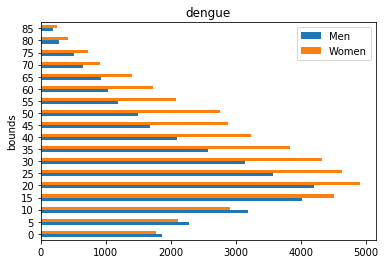

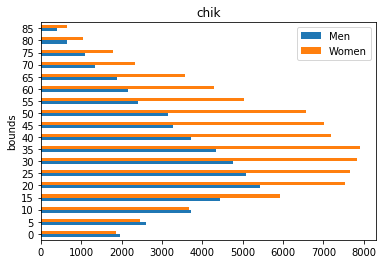

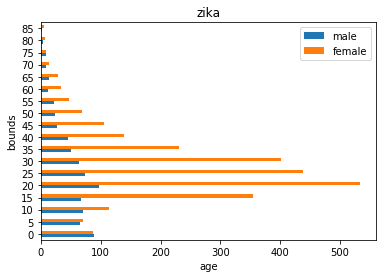

In [105]:
#from pylab import *
#subplot(3,1,1)
den_PFE.plot(kind='barh');
legend(['Men', 'Women']);
plt.title('dengue')
#subplot(3,1,2)
chik_PFE.plot(kind='barh');
legend(['Men', 'Women']);
plt.title('chik')
#subplot(3,1,3)
zika_PFE.plot(kind='barh');
legend(['Men', 'Women']);
plt.title('zika')
plt.xlabel('age');
plt.legend();

In [106]:
den_PFE.columns = ['den male','den female']
chik_PFE.columns = ['chik male','chik female']
zika_PFE.columns = ['zika male', 'zika female']

Concatenando as contagens de casos por faixa etária das 3 doenças em um único dataframe

In [107]:
diseases_PFE = pd.concat([den_PFE,chik_PFE,zika_PFE],axis=1)
diseases_PFE

,den male,den female,chik male,chik female,zika male,zika female
bounds,,,,,,
0,1868,1766,1954,1860,89,87
5,2276,2110,2614,2462,65,70
10,3187,2911,3725,3677,70,113
15,4025,4504,4444,5916,67,354
20,4209,4909,5419,7542,97,533
25,3580,4635,5086,7651,73,438
30,3143,4330,4771,7827,64,402
35,2575,3831,4345,7901,50,231
40,2099,3240,3717,7181,45,139


In [108]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


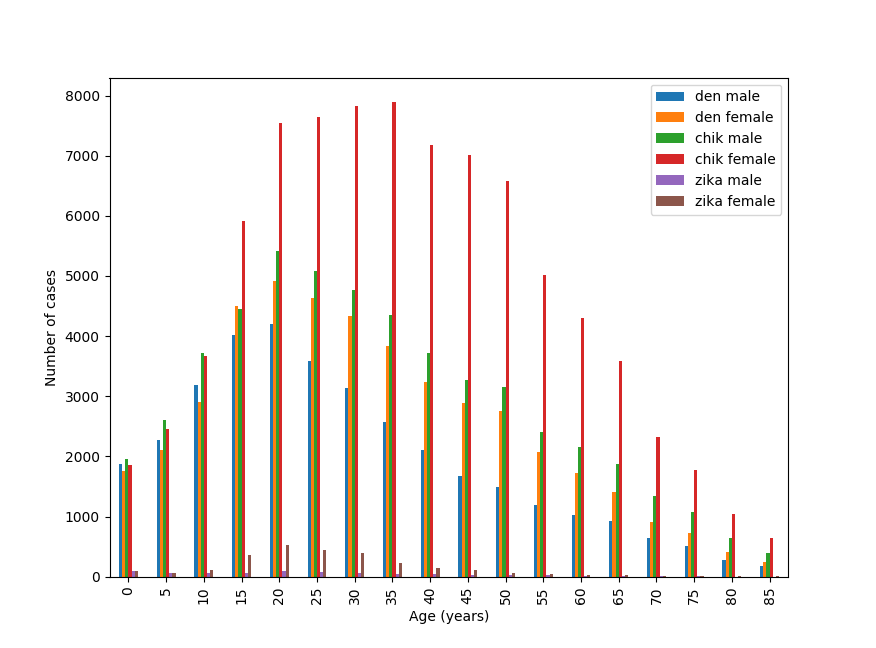

In [109]:
diseases_PFE.plot(kind='bar');#,  figsize=(15,8));
legend(['den male', 'den female', 'chik male', 'chik female', 'zika male', 'zika female'])
ylabel('Number of cases');
xlabel('Age (years)')
savefig('figures/diseases cases.png',dpi=400)

Queremos entender porque sempre temos mais casos em mulheres do que em homens. O próximo passo será ajustar um modelo aos dados que explique essa diferença para as três doenças.

In [110]:
def incidencia_por_sexo_normalizada(casosM,casosF,pir):
    """
    Recebe casos de homens e mulheres separados por faixa etária e a pirâmide etária do ano.
    Retorna dataframe com incidência por sexo por faixa etária
    """
    incid = pd.DataFrame()
    incid['bounds'] = bounds[:-1]
    incid['inc_M'] = [(n/N)*1e5 for n,N in zip(casosM,pir.homens)]
    incid['inc_F'] = [(n/N)*1e5 for n,N in zip(casosF,pir.mulheres)]
    return incid

In [111]:
chik17['aux'] = np.ones(len(chik17)) #criando coluna pra me auxiliar na pivot table
den17['aux'] = np.ones(len(den17))
zika17['aux'] = np.ones(len(zika17))

In [61]:
chik17[chik17.CS_SEXO=="I"].shape #vamos ignorar os sexos inexistentes para fazer a pivot table, pq são poucos

(62, 15)

Contagem de casos agrupados por dia e sexo

In [113]:
contagem_dia = chik17[chik17.CS_SEXO!='I'].pivot_table('aux', index=chik17[chik17.CS_SEXO!='I'].index, columns='CS_SEXO', aggfunc=sum)
contagem_dia = contagem_dia.fillna(0)
contagem_dia

CS_SEXO,F,M
DT_NOTIFIC,,
2017-01-01,2.0,1.0
2017-01-02,12.0,5.0
2017-01-03,10.0,8.0
2017-01-04,19.0,11.0
2017-01-05,19.0,11.0
2017-01-06,28.0,9.0
2017-01-07,14.0,10.0
2017-01-08,24.0,11.0
2017-01-09,25.0,18.0


<IPython.core.display.Javascript object>


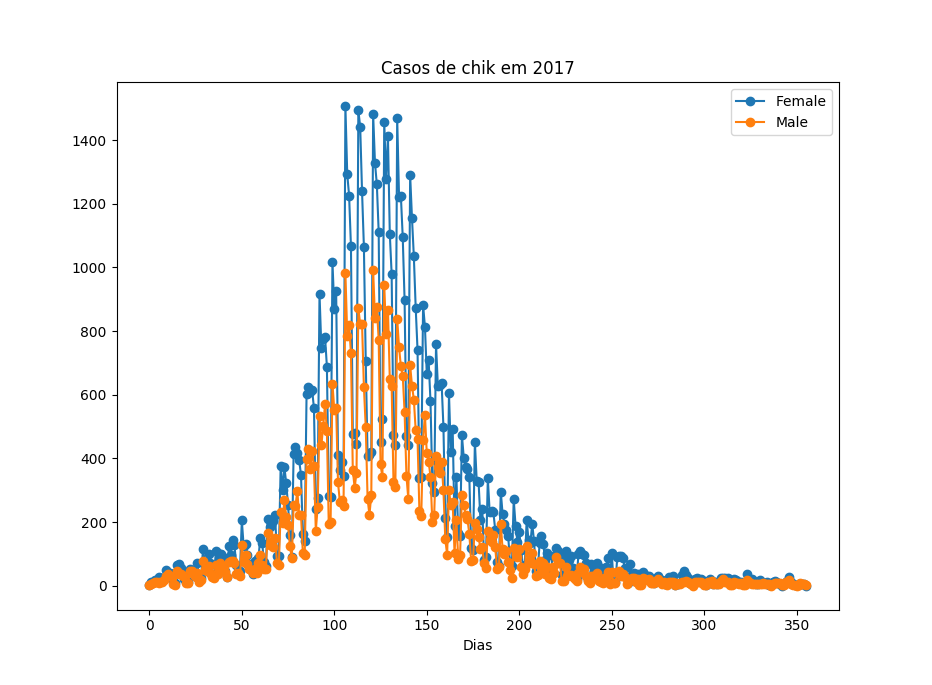

In [114]:
plt.plot(contagem_dia.values,'-o');
legend(['Female','Male']);
plt.xlabel('Dias');
plt.title('Casos de chik em 2017')
plt.legend();

In [115]:
chik17.groupby('CS_SEXO').aux.sum()

CS_SEXO
F    84502.0
I       62.0
M    52538.0
Name: aux, dtype: float64

In [116]:
den17.groupby('CS_SEXO').aux.sum()

CS_SEXO
F    45494.0
I       38.0
M    34955.0
Name: aux, dtype: float64

In [117]:
zika17.groupby('CS_SEXO').aux.sum()

CS_SEXO
F    2681.0
I       3.0
M     740.0
Name: aux, dtype: float64

<IPython.core.display.Javascript object>


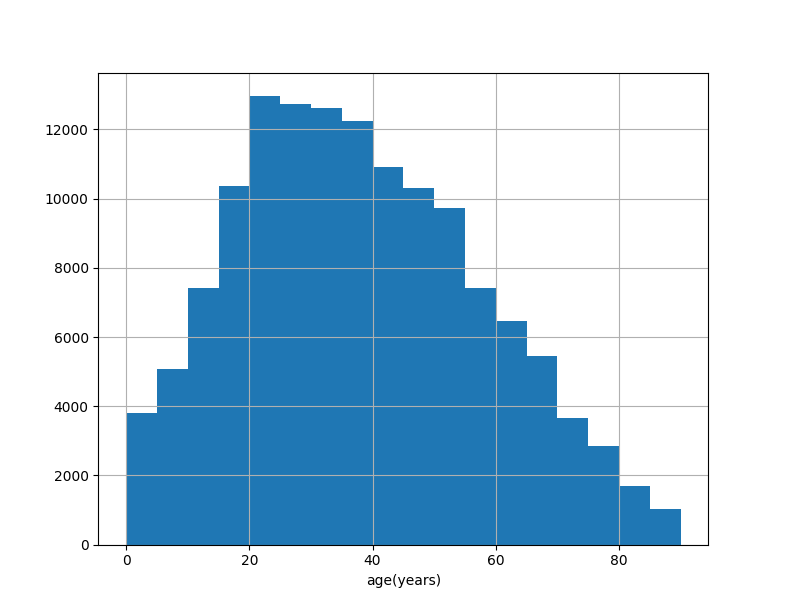

In [118]:
chik17.idade_anos.hist(bins=bounds);#,figsize=(11,7));#,range=(0,95));
xlabel('age(years)');